In [131]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

In [ ]:
To predict the eligibility of the customer for loan .

## Data Gathering 

In [2]:
df = pd.read_csv("bankdata.csv",sep='[;]',engine="python")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [3]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [63]:
df['duration'] = np.cbrt(df['duration'])


0        1.855734
1        1.743673
2        1.826281
3        1.746259
4        1.889508
           ...   
41183    1.907288
41184    1.936520
41185    1.790359
41186    1.967595
41187    1.837665
Name: duration, Length: 41188, dtype: float64

<AxesSubplot:>

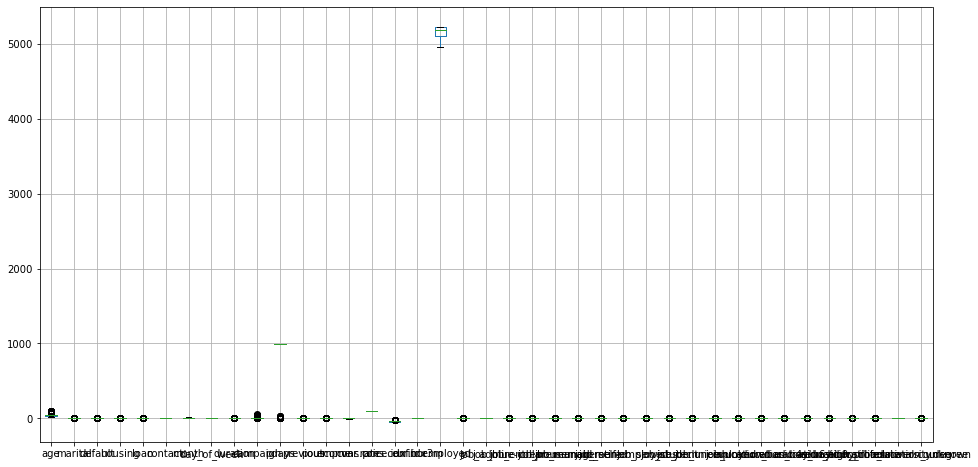

In [64]:
plt.figure(figsize=[16,8])
df.boxplot()

## 1.1 marital

In [12]:
df['marital'].value_counts()

1    24928
2    11568
3     4612
4       80
Name: marital, dtype: int64

In [13]:
df['marital'].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
df['marital'].replace({'married':1,'single':2,'divorced':3,'unknown':4},inplace=True)

In [14]:
df['marital'].dtypes

dtype('int64')

## 1.2.default

In [15]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [16]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [18]:
df['default'].replace({'no':0,'yes':1,'unknown':2},inplace=True)

In [19]:
df['default'].value_counts()

0    32588
2     8597
1        3
Name: default, dtype: int64

## 1.3.housing

In [20]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [21]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [26]:
df['housing'].replace({'no':0, 'yes':1, 'unknown':2},inplace = True)

In [27]:
df['housing'].value_counts()

1    21576
0    18622
3      990
Name: housing, dtype: int64

## 1.4 loan

In [28]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [29]:
df['loan'].replace({'no':0, 'yes':1, 'unknown':2},inplace = True)

In [30]:
df['loan'].value_counts()

0    33950
1     6248
2      990
Name: loan, dtype: int64

## 1.5.contact

In [31]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [32]:
df['contact'].replace({'telephone':0, 'cellular':1},inplace = True)

In [33]:
df['contact'].value_counts()

1    26144
0    15044
Name: contact, dtype: int64

## 1.6. month	

In [34]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [35]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [36]:
df['month'].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12,
                     'mar':3, 'apr':4, 'sep':9},inplace = True)

In [37]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9], dtype=int64)

## 1.7.day_of_week	

In [40]:
df['day_of_week'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [39]:
df['day_of_week'].replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5},inplace=True)

## 1.8.campaign

In [41]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

## 1.9.pdays

In [42]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

## 2.0 previous

In [43]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

## 2.1.poutcome

In [46]:
df['poutcome'].unique()

array([0, 1, 2], dtype=int64)

In [45]:
df['poutcome'].replace({'nonexistent':0, 'failure':1, 'success':2},inplace = True)

## 2.2.job

In [47]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [48]:
df = pd.get_dummies(df,columns=['job'])

## 2.3.education

In [54]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [55]:
df = pd.get_dummies(df,columns=['education'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41188 non-null  int64  
 2   default                        41188 non-null  int64  
 3   housing                        41188 non-null  int64  
 4   loan                           41188 non-null  int64  
 5   contact                        41188 non-null  int64  
 6   month                          41188 non-null  int64  
 7   day_of_week                    41188 non-null  int64  
 8   duration                       41188 non-null  int64  
 9   campaign                       41188 non-null  int64  
 10  pdays                          41188 non-null  int64  
 11  previous                       41188 non-null  int64  
 12  poutcome                       41188 non-null 

In [58]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [59]:
df['y'].replace({'no':0,'yes':1},inplace=True)

## model train 

In [65]:
x = df.drop('y',axis=1)
y = df['y']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=45,stratify=y)

## Logistic regression

In [68]:
LR = LogisticRegression()


In [71]:
LR.fit(x_train,y_train)

LogisticRegression()

In [73]:
# Evaluation
print("Train_Accuracy:",LR.score(x_train,y_train),"Test_Accuracy:",LR.score(x_test,y_test))

Train_Accuracy: 0.8979362670713201 Test_Accuracy: 0.9002184996358339


## KNeighborsClassifier

In [75]:
KNN = KNeighborsClassifier()


In [76]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
print("Train_Accuracy:",KNN.score(x_train,y_train),"Test_Accuracy:",KNN.score(x_test,y_test))

Train_Accuracy: 0.9169650986342944 Test_Accuracy: 0.8883224083515416


## Hyperparameter Tunning

In [80]:
# gridSearchCV
knn = KNeighborsClassifier()
hp  = {"n_neighbors":np.arange(1,15),
       "p":[1,2]}
gscv = GridSearchCV(knn,hp,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]})

In [81]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

In [82]:
Knn = KNeighborsClassifier(n_neighbors=14, p=1)

In [85]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14, p=1)

In [86]:
print("Train_Accuracy:",Knn.score(x_train,y_train),"Test_Accuracy:",Knn.score(x_test,y_test))

Train_Accuracy: 0.9060394537177542 Test_Accuracy: 0.8964554503520272


In [90]:
# randomSearCV
knn  = KNeighborsClassifier()
hp   = {"n_neighbors":np.arange(1,15),
       "p":[1,2]}
rscv = RandomizedSearchCV(knn,hp,cv=5)
rscv.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': [1, 2]})

In [91]:
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=13, p=1)

In [95]:
Knn1 = KNeighborsClassifier(n_neighbors=13, p=1)

In [96]:
Knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13, p=1)

In [97]:
print("Train_Accuracy:",Knn1.score(x_train,y_train),"Test_Accuracy:",Knn1.score(x_test,y_test))

Train_Accuracy: 0.9070713201820941 Test_Accuracy: 0.8947560087399854


## Desicion Tree 

In [98]:
DT = DecisionTreeClassifier()

In [99]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
print("Train_Accuracy:",DT.score(x_train,y_train),"Test_Accuracy:",DT.score(x_test,y_test))

Train_Accuracy: 1.0 Test_Accuracy: 0.8832240835154164


## Hyperparameter Tunning

In [102]:
dt_clf = DecisionTreeClassifier()
hp     = {"criterion" :['gini','entropy'],
         "max_depth" :np.arange(2,8),
        "min_samples_split":np.arange(3,20),
        "min_samples_leaf":np.arange(3,15)}
rscv   = RandomizedSearchCV(dt_clf,hp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [104]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=8)

In [105]:
DT1 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=8)

In [106]:
DT1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=8)

In [107]:
print("Train_Accuracy:",DT1.score(x_train,y_train),"Test_Accuracy:",DT1.score(x_test,y_test))

Train_Accuracy: 0.9190288315629742 Test_Accuracy: 0.9100509832483612


## Pre-pruning

In [108]:
dt_model_tree = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0)
dt_model_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [109]:
print("Train_Accuracy:",dt_model_tree.score(x_train,y_train),"Test_Accuracy:",dt_model_tree.score(x_test,y_test))

Train_Accuracy: 1.0 Test_Accuracy: 0.8841951930080116


## Post-pruning

In [111]:
dt_tree        = dt_model_tree.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = dt_tree['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 1.48648230e-05, 1.50746745e-05, ...,
       1.12816540e-02, 2.45618669e-02, 3.11562334e-02])

In [113]:
ccp_alpha_list.shape

(1002,)

In [112]:
train_accuracy_list = []
test_accuracy_list  = []
for i in ccp_alpha_list:
    dt_model = DecisionTreeClassifier(random_state=45,ccp_alpha=i)
    dt_model.fit(x_train,y_train)
    
    train_accuracy_list.append(dt_model.score(x_train,y_train))
    test_accuracy_list.append(dt_model.score(x_test,y_test))

In [114]:
np.where(test_accuracy_list==max(test_accuracy_list))

(array([949, 950], dtype=int64),)

In [115]:
ccp_alpha_list[949],ccp_alpha_list[950]

(0.00012167992563508739, 0.00012208113886417782)

In [116]:
train_accuracy_list[949],test_accuracy_list[949] # selected model

(0.9226707132018209, 0.9124787569798495)

In [117]:
train_accuracy_list[950],test_accuracy_list[950]

(0.9223065250379363, 0.9124787569798495)

In [118]:
new_DT = DecisionTreeClassifier(random_state=45,ccp_alpha=0.00012167992563508739)

In [119]:
new_DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00012167992563508739, random_state=45)

In [120]:
print("Train_Accuracy:",new_DT.score(x_train,y_train),"Test_Accuracy:",new_DT.score(x_test,y_test))

Train_Accuracy: 0.9226707132018209 Test_Accuracy: 0.9124787569798495


## Random-Forest

In [121]:
RF = RandomForestClassifier()

In [122]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
print("Train_Accuracy:",RF.score(x_train,y_train),"Test_Accuracy:",RF.score(x_test,y_test))

Train_Accuracy: 1.0 Test_Accuracy: 0.9066521000242778


## Hyperparameter-Tunning

In [125]:
RF_tree = RandomForestClassifier()
hp      = {"n_estimators":np.arange(1,10),
            "criterion":['gini','entropy'],
            "max_depth":np.arange(2,8),
            "min_samples_split":np.arange(3,10),
            "min_samples_leaf":np.arange(2,8),
             "max_features":['sqrt','log'],
             "max_leaf_nodes":np.arange(1,3),
             
             "random_state":[39,40,41,42,43,44] }
rscv     = RandomizedSearchCV(RF_tree,hp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log'],
                                        'max_leaf_nodes': array([1, 2]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [39, 40, 41, 42, 43,
                                                         44]})

In [126]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=2,
                       min_samples_leaf=7, min_samples_split=5, n_estimators=8,
                       random_state=43)

In [128]:
new_Rf = RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=2,
                       min_samples_leaf=7, min_samples_split=5, n_estimators=8,
                       random_state=43)

In [129]:
new_Rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=2,
                       min_samples_leaf=7, min_samples_split=5, n_estimators=8,
                       random_state=43)

In [130]:
print("Train_Accuracy:",new_Rf.score(x_train,y_train),"Test_Accuracy:",new_Rf.score(x_test,y_test))

Train_Accuracy: 0.8873444613050075 Test_Accuracy: 0.8873512988589464


## Accuracy Compaire

In [ ]:
1. Logistic :Train_Accuracy: 0.8979362670713201   Test_Accuracy: 0.9002184996358339
            

2. KNN :    Train_Accuracy: 1.0                 Test_Accuracy: 0.8832240835154164
   hp  :   Train_Accuracy: 0.9190288315629742    Test_Accuracy: 0.9100509832483612

3. Desion Tree : Train_Accuracy: 0.9190288315629742   Test_Accuracy: 0.9100509832483612
    pre-p :      Train_Accuracy: 1.0                  Test_Accuracy: 0.8841951930080116
  post-p :      Train_Accuracy: 0.9226707132018209    Test_Accuracy: 0.9124787569798495


3. Random-F : Train_Accuracy: 1.0                  Test_Accuracy: 0.9066521000242778
   hp       : Train_Accuracy: 0.8873444613050075   Test_Accuracy: 0.8873512988589464

In [133]:
with open("MODEL.pkl","wb")as file:
    pickle.dump(new_DT,file)

In [144]:
marital_value={'married':1,'single':2,'divorced':3,'unknown':4}

default_value={'no':0,'yes':1,'unknown':2}

housing_value={'no':0, 'yes':1, 'unknown':2}

loan_value={'no':0, 'yes':1, 'unknown':2}

contact_value={'telephone':0, 'cellular':1}

month_value={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12,
                     'mar':3, 'apr':4, 'sep':9}

day_of_week_value={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}

poutcome_value={'nonexistent':0, 'failure':1, 'success':2}

y_value={'no':0,'yes':1}

columns_names = x.columns

In [134]:
project_data = {"marital_value":marital_value,"default_value":default_value,
                "housing_value":housing_value,"loan_value":loan_value,
                "contact_value":contact_value,"month_value":month_value,
                "day_of_week_value":day_of_week_value,
                "poutcome_value":poutcome_value,
                "y_value":y_value,
                "columns":list(x.columns)}

In [135]:
with open("project_data.json","w")as file:
    json.dump(project_data,file)

In [138]:
df = pd.read_csv("bankdata.csv",sep='[;]',engine="python")
df.iloc[20]

age                        30
job                unemployed
marital               married
education         high.school
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                   38
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 20, dtype: object

In [151]:
age       =                  30
job       =           "job_"+"unemployed"
marital   =            "married"
education =       "education_"+"high.school"
default   =                "no"
housing   =                 "no"
loan      =                 "no"
contact   =          "telephone"
month     =                "may"
day_of_week =              "mon"
duration   =                38
campaign    =                1
pdays       =              999
previous    =                0
poutcome    =      "nonexistent"
emp_var_rate  =            1.1
cons_price_idx  =       93.994
cons_conf_idx   =        -36.4
euribor3m       =        4.857
nr_employed     =       51910

In [ ]:
test_arr

In [161]:
test_arr = np.zeros(38)

In [142]:
x.isna().sum()

age                              0
marital                          0
default                          0
housing                          0
loan                             0
contact                          0
month                            0
day_of_week                      0
duration                         0
campaign                         0
pdays                            0
previous                         0
poutcome                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed      

In [162]:
test_arr[0] = age

test_arr[1] = marital_value[marital]

test_arr[2] = default_value[default]
test_arr[3] = housing_value[housing]
test_arr[4] = loan_value[loan]
test_arr[5] = contact_value[contact]
test_arr[6] = month_value[month]
test_arr[7] = day_of_week_value[day_of_week]
test_arr[8] = duration
test_arr[9] = campaign
test_arr[10] = pdays
test_arr[11] = previous
test_arr[12] = poutcome_value[poutcome]
test_arr[13] = emp_var_rate
test_arr[14] = cons_price_idx
test_arr[15] = cons_conf_idx
test_arr[16] = euribor3m
test_arr[17] = nr_employed

job_index = np.where(columns_names == job)[0][0]
test_arr[job_index] = 1

education_index = np.where(columns_names == education)[0][0]
test_arr[education_index] = 1



In [154]:
job_index = np.where(columns_names == job)[0][0]
job_index

28

In [149]:
x.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown'],
      dtype='object')

In [163]:
test_arr

array([ 3.0000e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  5.0000e+00,  1.0000e+00,  3.8000e+01,  1.0000e+00,
        9.9900e+02,  0.0000e+00,  0.0000e+00,  1.1000e+00,  9.3994e+01,
       -3.6400e+01,  4.8570e+00,  5.1910e+04,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00])

In [168]:
pred = new_DT.predict([test_arr])
pred

array([0], dtype=int64)